# Multi Color Thresholding

In [1]:
# Detecting Single Color
# import library
import cv2 as cv
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

### Mounting

In [13]:
from google.colab import files
uploated = files.upload()

Saving flower_1.jpeg to flower_1.jpeg


### Data Loading

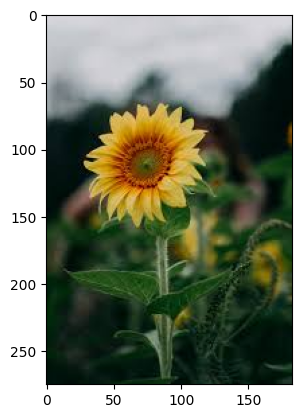

In [28]:
# Load the input image
input_image_path = '/content/flower_1.jpeg'
image = cv.imread(input_image_path)
img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# plt.imshow(img_rgb) # Original image (default RGB)
plt.imshow(img_rgb)   # Image in hsb color space
plt.show()

Result Analysis

- In HSV space - edge seperation comperatively good, it more readable by computer than that of us

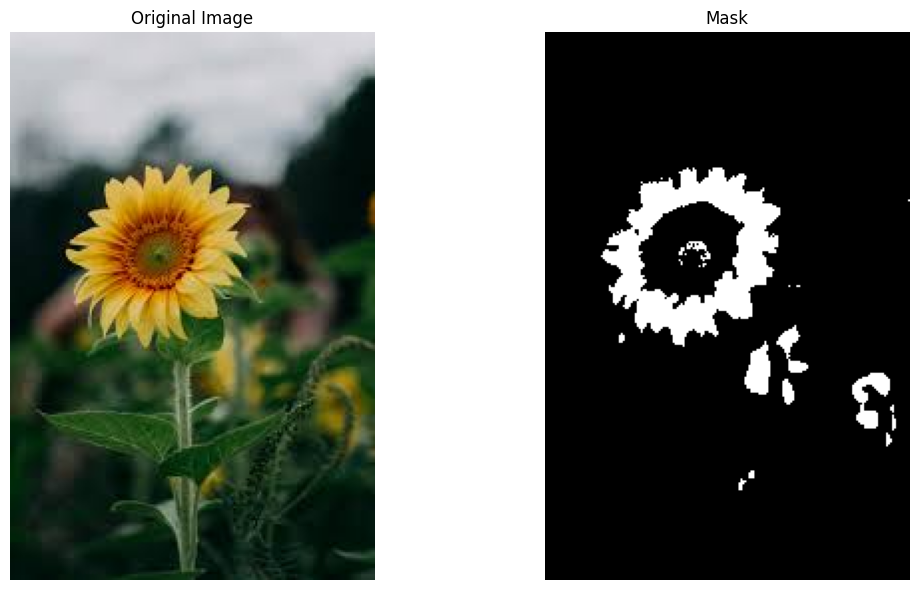

In [29]:
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/flower_1.jpeg'
img = cv.imread(image_path)                     # Loaded without conversion (Default BGR- cv2)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_yellow = np.array([20, 100, 100])  # Lower bound for yellow   -- Hue, Saturation & Value (representing 3 values)
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only blue colors
thr = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thr, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

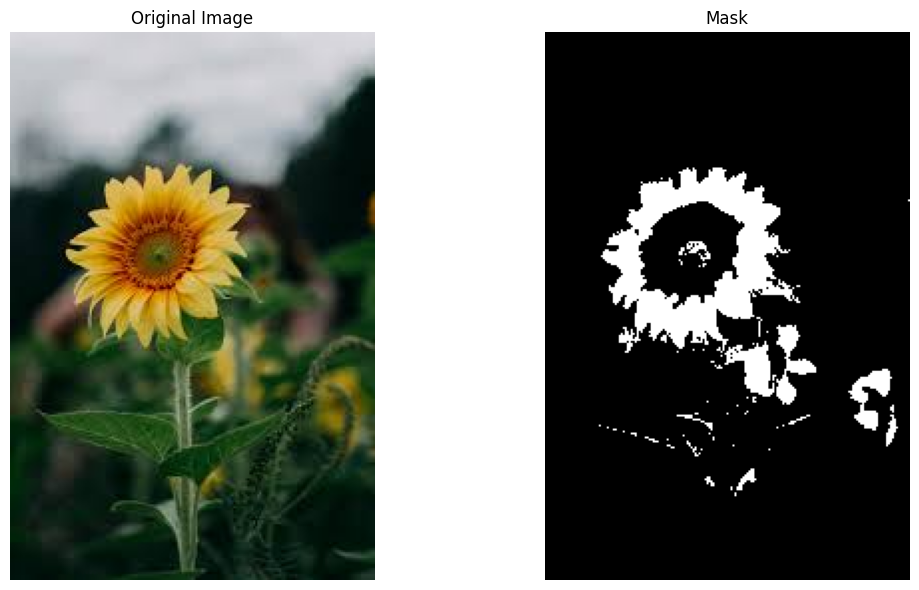

In [30]:
# Test 2: Try for Greenshi
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/flower_1.jpeg'
img = cv.imread(image_path)                     # Loaded without conversion (Default BGR- cv2)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV   (Experiment Greenish - 63)
lower_yellow = np.array([20, 100, 100])  # Lower bound for yellow   -- Hue, Saturation & Value (representing 3 values)
upper_yellow = np.array([63, 255, 255])  # Upper bound for yellow --- lets try to capter greenish (63) color

# Threshold the HSV image to get only blue colors
thr = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thr, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

## Masking

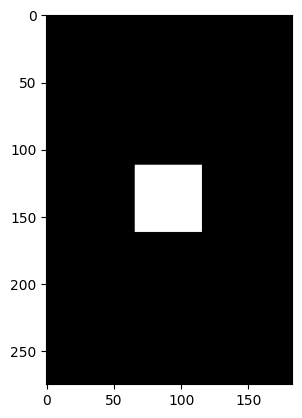

In [31]:
# Get the dimensions of the image
height, width, _ = img.shape            # height & weight has taken from img shape

# Create a binary mask of the same size as the image, initialized to zeros (black) in input shape
mask = np.zeros((height, width), dtype=np.uint8)   # its a grayscale image, full dark due to zeros

# Define the size and position of the square
square_size = 50
top_left_x = (width - square_size) //2    # width of main img shape - didived by 2 for central position; width (200-50)
top_left_y = (height - square_size) //2   # height of main img shape - didived by 2 for central position heigh (300-50)

# Create a white square in the mask- before this full was zero (black), now creating mask (array sliching)
mask[top_left_y:top_left_y + square_size, top_left_x:top_left_x + square_size] = 255 # defining convet this part as white e.g 255

#plt.imshow(mask)

# Convert the mask to a 3-channel mask  (Usefull for applying the mask into orinal RBB image)
mask_rgb = cv.cvtColor(mask, cv.COLOR_GRAY2RGB) # mask for 3channel / for applying on original image
plt.imshow(mask_rgb)

**Masking**
- Upto now, mask for single channel / grayscale (black & white)
- what about to apply on original image which is RGB (3 Channels) ?
- in original value, for 3, it will try to compare for all this three, but we have one channel, so it wont work, then what to do ?
- So I need to convert this into 3 channel first :
  - mask_3channel = cv.cvtColor(mask, cv.COLOR_GRAY2RGB) (using this formula)


First, we need to convert the grayscale mask into a 3-channel image. Using the formula:

\begin{equation}
\text{mask_3channel} = \text{cv.cvtColor}(\text{mask}, \text{cv.COLOR_GRAY2RGB})
\end{equation}

This will allow us to apply the mask on an RGB image.


## Apply the Mask on Original Image

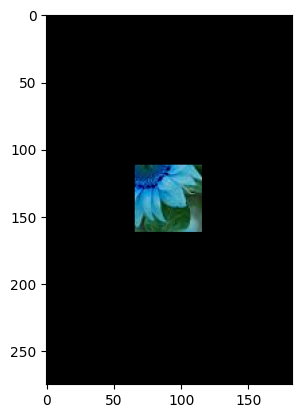

In [34]:
# Apply mask in RGB (original image)
result = cv.bitwise_and(image, mask_rgb)
# Display the original image, mask, and result
# plt.imshow(image)
plt.imshow(result)

# Latex

Here is an example equation: Using LaTex Dollar sign for math equation

$$
E = mc^2
$$

$$
Y = mx +c
$$

$$max(s) = \max\limits{i: x_i \in \{S\}} x_i$$

Sigmoid Fuctions :
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
Relu Fuction:
$$
f(x) = max(0,x)
$$
